In this notebook, we'll train a decision tree classifier on diabetes data and visualize the decision tree with graphviz

In [1]:
from sklearn import tree
import graphviz

here we download the data from plotly

In [2]:
!wget https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv

--2023-08-22 19:37:54--  https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 0.002s  

2023-08-22 19:37:54 (12.2 MB/s) - ‘diabetes.csv’ saved [23873/23873]



Next, we'll manually process the data from its comma separated value (csv) format

In [3]:
with open("diabetes.csv", "r") as f:
    data = f.readlines()
feats = data[0]
feats = feats.replace('\n','')
feats = feats.split(",")

Let's print the columns in the dataset

In [4]:
print(feats)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


We now load the data into a list, `dat` and create a variable `labs` containing the label for a positive or negative example of diabetes

In [5]:
feats = feats[0:(len(feats)-1)]
dat = []
labs = []
for i in range(1,len(data)):
     line = data[i]
     line = line.replace('\n','')
     csvline = line.split(",")
     labs = labs + [int(csvline[len(csvline)-1])]
     csvline = [float(csvline[i]) for i in range(len(csvline)-1)]
     dat = dat + [csvline]

Let's find out how many examples we have

In [6]:
print(len(dat))

768


We can also examine an example row in the data, row 15

In [7]:
print(dat[15])

[7.0, 100.0, 0.0, 0.0, 0.0, 30.0, 0.484, 32.0]


Using scikit-learn, a machine learning library in Python, we'll train a decision tree 3 decision rules and fit it to our data and labels

In [8]:

clf = tree.DecisionTreeClassifier(max_leaf_nodes = 3)
clf = clf.fit(dat, labs)

We can calculate the accuracy of this model

In [9]:
correct = 0
for i in range(len(dat)):
    if clf.predict([dat[i]]) == labs[i]: correct = correct + 1
100.0* correct / len(dat)

77.21354166666667

Finally, we'll visualze our decision tree

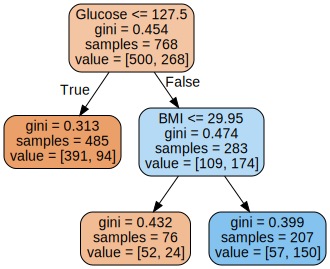

In [10]:
dot_data = tree.export_graphviz(clf, feature_names=feats,
                      filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph